# Análise Exploratória - Dados de Emissões



## Leitura e análise inicial dos dados

Inicializar um DataFrame a partir do arquivo `../data/Gas Emissions/total-ghg-emissions.csv`

In [35]:
# Resposta:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/Gas Emissions/total-ghg-emissions.csv', sep=',')
df.head(n=15)

,Entity,Code,Year,Total including LUCF
0,Afghanistan,AFG,1990,9.580000e+06
1,Afghanistan,AFG,1991,9.810000e+06
2,Afghanistan,AFG,1992,9.030000e+06
3,Afghanistan,AFG,1993,9.110000e+06
4,Afghanistan,AFG,1994,9.150000e+06
5,Afghanistan,AFG,1995,9.580000e+06
6,Afghanistan,AFG,1996,1.061000e+07
7,Afghanistan,AFG,1997,1.158000e+07
8,Afghanistan,AFG,1998,1.240000e+07
9,Afghanistan,AFG,1999,1.328000e+07


Selecionar as colunas desejadas

In [66]:
# Resposta:
from operator import concat


df_test = df[['Entity', 'Year', 'Total including LUCF']]
#df_decade['new_col'] = concat(df_decade['Year'].astype(str).str[0], df_decade['Year'].astype(str).str[1])
df.dtypes

Entity                   object
Code                     object
Year                      int64
Total including LUCF    float64
dtype: object

Separar os valores por década

In [67]:
from operator import concat
df_test['Decade'] = df_test['Year']/10
df_test = df_test.astype({'Decade':'int'})
df_test['Decade'] = df_test['Decade']*10

df_test = df_test.groupby(['Entity', 'Decade']).mean()
df_test.pop('Year')
df_test['Total including LUCF'] = df_test['Total including LUCF']*10^6


Total including LUCF
Entity      Decade                      
Afghanistan 1990            1.041300e+07
            2000            1.638600e+07
            2010            2.754500e+07
Africa      1990            2.374172e+09
            2000            2.937138e+09
...                                  ...
Zambia      2000            5.884900e+07
            2010            8.618000e+07
Zimbabwe    1990            4.186300e+07
            2000            3.849400e+07
            2010            7.165600e+07

[615 rows x 1 columns]

## Visualização da distribuição das variáveis

Verificar os países que mais emitiam gases por década

<AxesSubplot:>

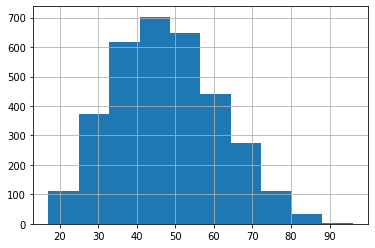

In [23]:
# Resposta:
# df_masc = df.loc[df['SEXO'] == 'M']
# df_masc['IDADE'].hist()

<AxesSubplot:>

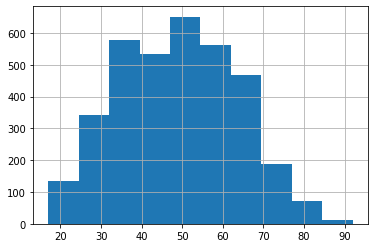

In [24]:
# Resposta:
# df_fem= df.loc[df['SEXO'] == 'F']
# df_fem['IDADE'].hist()

#A distribuição é bem semelhante, porém é possível visualizar uma maior quantidade de mulheres mais velhas

Exiba um BoxPlot das idades de acordo com o sexo do reclamante para ver se as diferenças ficam mais óbvias. 

**Dica:** Para exibir boxplots agrupados por categoria, use o método `boxplot` como no exemplo: `df.boxplot(column='IDADE', by = 'SEXO')`.

<AxesSubplot:title={'center':'IDADE'}, xlabel='SEXO'>

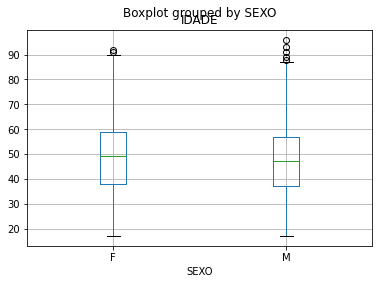

In [25]:
# Resposta:

# df.boxplot(column = 'IDADE', by = 'SEXO')

## Seleção dos dados

Nesta etapa vamos filtrar apenas linhas com os tipos de relamação (assuntos) mais comuns.

- Faça uma contagem dos assuntos mais comuns (usando `groupby`). Revise o procedimento no tutorial de Manipulação e Agregação de Dados, se necessário.
- Crie uma lista contendo os assuntos com mais de 60 reclamações. Armazene a lista em uma variável para uso posterior.

**Dica:** Para criar uma lista a partir de uma coluna de valores, use o comando `list()` como no exemplo: `list(df_grouped_top['ASSUNTO'])`

In [26]:
# Resposta:
# df_assunto = df.groupby(['ASSUNTO']).size().sort_values(ascending=False).reset_index(name='total')
# df_assunto = df_assunto[df_assunto['total']>60]
# df_assunto


,ASSUNTO,total
0,COLETA,1632
1,ILUMINAÇÃO PÚBLICA,992
2,TRÂNSITO,867
3,ABORDAGEM SOCIAL DE RUA - ADULTO,321
4,POSTO DE SAÚDE,309
5,"MOTORISTAS, COBRADORES E PORTEIROS",232
6,DISQUE SOLIDARIEDADE,191
7,POLUIÇÃO,135
8,OUTROS SETORES SMS,128
9,FISCALIZAÇÃO DE TERRENOS BALDIOS OU EDIFICADOS,124


In [27]:
# Resposta:
# lista_assunto = list(df_assunto['ASSUNTO'])
# lista_assunto

['COLETA',
 'ILUMINAÇÃO PÚBLICA',
 'TRÂNSITO',
 'ABORDAGEM SOCIAL DE RUA - ADULTO',
 'POSTO DE SAÚDE',
 'MOTORISTAS, COBRADORES E PORTEIROS',
 'DISQUE SOLIDARIEDADE',
 'POLUIÇÃO',
 'OUTROS SETORES SMS',
 'FISCALIZAÇÃO DE TERRENOS BALDIOS OU EDIFICADOS',
 'ANIMAIS',
 'ANIMAIS DOMÉSTICOS',
 'SEMÁFORO',
 'ÁRVORE',
 'FAUNA SINANTRÓPICA',
 'DRENAGEM',
 'UNIDADE DE PRONTO ATENDIMENTO',
 'LIMPEZA']

Crie um novo DataFrame contendo apenas reclamações contidas na lista das reclamações mais comuns.

**Dica:** Para filtrar linhas que contêm valores de uma lista, use o método `isin()`. Por exemplo, `df['ASSUNTO'].isin(lista_top)` retorna uma lista de valores True/False que pode ser usada para selecionar as linhas de interesse.

In [28]:
# Resposta:

#df_top_assuntos = pd.DataFrame (lista_assunto, columns = ['ASSUNTO'])
# df_top_assuntos

,ASSUNTO
0,COLETA
1,ILUMINAÇÃO PÚBLICA
2,TRÂNSITO
3,ABORDAGEM SOCIAL DE RUA - ADULTO
4,POSTO DE SAÚDE
5,"MOTORISTAS, COBRADORES E PORTEIROS"
6,DISQUE SOLIDARIEDADE
7,POLUIÇÃO
8,OUTROS SETORES SMS
9,FISCALIZAÇÃO DE TERRENOS BALDIOS OU EDIFICADOS


## Análise de similaridades entre reclamações de bairros

Queremos agora identificar bairros com problemas similares. Use o método `crosstab()` para gerar um novo DataFrame com os bairros nas colunas e os assuntos (os mais comuns, filtrados acima) nas linhas. 

In [29]:
# # Resposta:
# df_new = pd.crosstab(df_top_assuntos['ASSUNTO'], df['BAIRRO_ASS'])
# df_new

BAIRRO_ASS,centro,jardim botanico,reboucas,sao francisco
ASSUNTO,,,,
ABORDAGEM SOCIAL DE RUA - ADULTO,0,0,0,1
ANIMAIS,0,1,0,0
ANIMAIS DOMÉSTICOS,0,1,0,0
COLETA,1,0,0,0
DISQUE SOLIDARIEDADE,0,1,0,0
DRENAGEM,0,1,0,0
FAUNA SINANTRÓPICA,0,1,0,0
FISCALIZAÇÃO DE TERRENOS BALDIOS OU EDIFICADOS,0,1,0,0
ILUMINAÇÃO PÚBLICA,1,0,0,0


Usando o DataFrame obtido anteriormente, gere a matriz de correlações entre bairros (método `corr()`).

In [30]:
# Resposta:
# df_new.corr()

BAIRRO_ASS,centro,jardim botanico,reboucas,sao francisco
BAIRRO_ASS,,,,
centro,1.000000,-0.632456,-0.108465,-0.158114
jardim botanico,-0.632456,1.000000,-0.342997,-0.500000
reboucas,-0.108465,-0.342997,1.000000,-0.085749
sao francisco,-0.158114,-0.500000,-0.085749,1.000000


Use um Heatmap para exibir as correlações com cores.

In [31]:
# Resposta:
# df_corr = df_new.corr()
# df_corr = df_corr.style.background_gradient(cmap='RdBu')
# df_corr

BAIRRO_ASS,centro,jardim botanico,reboucas,sao francisco
BAIRRO_ASS,,,,
centro,1.000000,-0.632456,-0.108465,-0.158114
jardim botanico,-0.632456,1.000000,-0.342997,-0.500000
reboucas,-0.108465,-0.342997,1.000000,-0.085749
sao francisco,-0.158114,-0.500000,-0.085749,1.000000


É possível perceber algum padrão entre os bairros baseando-se nas correlações obtidas?

R: O jardim botânico é o bairro que possui grande número de maiores reclamações, pela diferença entre os outros bairros

## Análise de bairros mais problemáticos

Agora nosso interesse é determinar os bairros com mais reclamações.

- Crie um DataFrame com a contagem de reclamações por bairro (usando a coluna BAIRRO_ASS).
- Exiba os dados usando um gráfico de barras para visualizarmos os bairros com mais reclamações

In [32]:
# Resposta:
# df_bairros_reclamacoes = df.groupby(['BAIRRO_ASS']).size().sort_values(ascending=False).reset_index(name='total')
# df_bairros_reclamacoes


,BAIRRO_ASS,total
0,cidade industrial,405
1,centro,403
2,cajuru,310
3,sitio cercado,252
4,boqueirao,242
...,...,...
70,cascatinha,9
71,caximba,4
72,sao miguel,3
73,riviera,1


<AxesSubplot:xlabel='BAIRRO_ASS'>

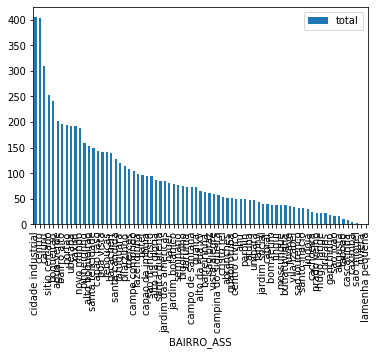

In [33]:
# Resposta:

# df_bairros_reclamacoes.plot.bar(x='BAIRRO_ASS', y= 'total')

O problema de considerar apenas o total de reclamações é que não estamos considerando a população dos bairros. Então o ideal é calcular a *taxa* de reclamações, ou seja, o número de reclamações por habitante do bairro.

- Crie um novo DataFrame a partir dos dados do arquivo `../data/dados_bairros.csv`.
- Converta os nomes dos bairros deste DataFrame para caixa-baixo (minúsculo).
- Faça uma junção do DataFrame de totais por bairro com o novo DataFrame.

**Dica:** Para especificar as colunas contendo os valores base para a junção, especifique os parâmetros `left_on` e `right_on` no método `merge`.

In [34]:
# Resposta:
# df_pop_bairros = pd.read_csv('../data/dados_bairros.csv', sep=',', encoding='latin-1')
# df_pop_bairros['Bairro'] = df_pop_bairros['Bairro'].str.lower()
# df_pop_bairros = df_pop_bairros.join(df_bairros_reclamacoes)
# df_pop_bairros

,Bairro,AreaKm2,Homens,Mulheres,Total,Domicilios,RendimentoDom,BAIRRO_ASS,total
0,alto boqueiao,"12,11",24824,26331,51155,14301,"1110,63",cidade industrial,405
1,lamenha pequena,"3,4",353,348,701,188,"665,99",centro,403
2,xaxim,"8,92",26747,27944,54691,15482,"1211,6",cajuru,310
3,riviera,"2,36",100,103,203,62,"423,13",sitio cercado,252
4,sao miguel,7,2512,2399,4911,1247,"409,43",boqueirao,242
...,...,...,...,...,...,...,...,...,...
70,agua verde,"4,76",22546,27320,49866,17045,"3332,57",cascatinha,9
71,alto da gloria,"0,88",2513,3075,5588,2125,"3263,47",caximba,4
72,bigorrilho,"3,5",12359,14768,27127,9937,"3792,68",sao miguel,3
73,mossungue,"3,38",2751,2877,5628,1586,"2965,09",riviera,1


Crie uma nova coluna chamada *taxa* contendo o resultado da divisão da coluna de contagem de reclamações pela coluna de total de habitantes.

In [35]:
# Resposta:

# df_pop_bairros['taxa'] = df_pop_bairros.total /  df_pop_bairros.Total

# df_pop_bairros

,Bairro,AreaKm2,Homens,Mulheres,Total,Domicilios,RendimentoDom,BAIRRO_ASS,total,taxa
0,alto boqueiao,"12,11",24824,26331,51155,14301,"1110,63",cidade industrial,405,0.007917
1,lamenha pequena,"3,4",353,348,701,188,"665,99",centro,403,0.574893
2,xaxim,"8,92",26747,27944,54691,15482,"1211,6",cajuru,310,0.005668
3,riviera,"2,36",100,103,203,62,"423,13",sitio cercado,252,1.241379
4,sao miguel,7,2512,2399,4911,1247,"409,43",boqueirao,242,0.049277
...,...,...,...,...,...,...,...,...,...,...
70,agua verde,"4,76",22546,27320,49866,17045,"3332,57",cascatinha,9,0.000180
71,alto da gloria,"0,88",2513,3075,5588,2125,"3263,47",caximba,4,0.000716
72,bigorrilho,"3,5",12359,14768,27127,9937,"3792,68",sao miguel,3,0.000111
73,mossungue,"3,38",2751,2877,5628,1586,"2965,09",riviera,1,0.000178


Exiba um gráfico de barras mostrando os bairros de acordo com a taxa de reclamações.

<AxesSubplot:xlabel='BAIRRO_ASS'>

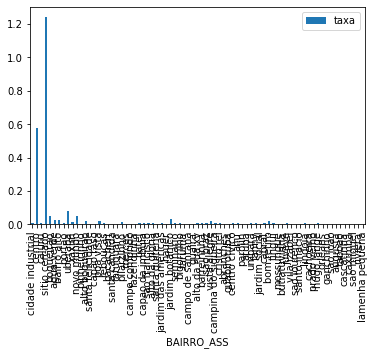

In [36]:
# Resposta:

# df_pop_bairros.plot.bar(x='BAIRRO_ASS', y= 'taxa')

## Analisando tendências temporais

Vamos agora identificar os meses com mais reclamações. 

- Usando o DataFrame completo (lido a partir do CSV), converta a coluna *DATA* para o tipo `datetime`. Revise o tutorial de Limpeza de Dados se necessário.
- Agrupe as linhas contando as reclamações por mês. Revise o tutorial de Análise Exploratória se necessário.
- Exiba um gráfico de linha com a evolução da contagem.


In [37]:
# Resposta:
# df['DATA']= pd.to_datetime(df['DATA'], infer_datetime_format = True)
# df_mes = df.groupby(df.DATA.dt.month).size().reset_index(name='total')
# df_mes




,DATA,total
0,1,1071
1,2,203
2,3,243
3,4,242
4,5,339
5,6,262
6,7,338
7,8,283
8,9,328
9,10,312


<AxesSubplot:xlabel='DATA'>

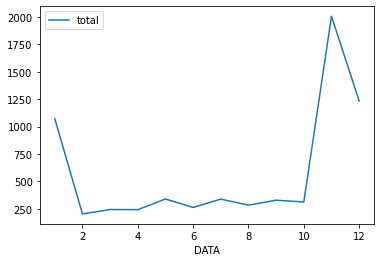

In [38]:
# # Resposta:
# df_mes.plot.line(x='DATA', y ='total')